# Feature Selection Technique
Study 5 feature selection techniques on the regression data set and report top five features

### Importing Required Packages and Importing Dataset

In [22]:
#import required packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

sns.set()

In [23]:
#import required dataset into pandas dataframe
data = sns.load_dataset('diamonds')

In [24]:
#printing dataset shape
print("Dataset Shape : ", data.shape)
#printing dataset observations
data.head()

Dataset Shape :  (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
#obtaining information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [26]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Data Preprocessing

In [27]:
data['cut'] = data['cut'].astype('str')
data['color'] = data['color'].astype('str')
data['clarity'] = data['clarity'].astype('str')

**Duplicate Values**

In [28]:
#find out number of duplicate values
data.duplicated().sum()

146

In [29]:
print("Dataset Shape before: ", data.shape)
data.drop_duplicates(inplace=True)
print("Dataset Shape after: ", data.shape)

Dataset Shape before:  (53940, 10)
Dataset Shape after:  (53794, 10)


**Outliers**

In [30]:
data['price_z_score'] = np.abs(stats.zscore(data['price']))
data = data[data['price_z_score']<=3]
data.drop('price_z_score', axis=1, inplace=True)

**Label Encoding**

In [31]:
label_encoder = preprocessing.LabelEncoder()

data['cut']= label_encoder.fit_transform(data['cut'])
data['color']= label_encoder.fit_transform(data['color'])
data['clarity']= label_encoder.fit_transform(data['clarity'])

**Data Split**

In [32]:
#Separating the dependent and independent variable
X = data.drop('price', axis=1)
X = X[0:30000]
Y = data['price']
Y = Y[0:30000]

### Feature Selection Technique

**Correlation Coefficient**

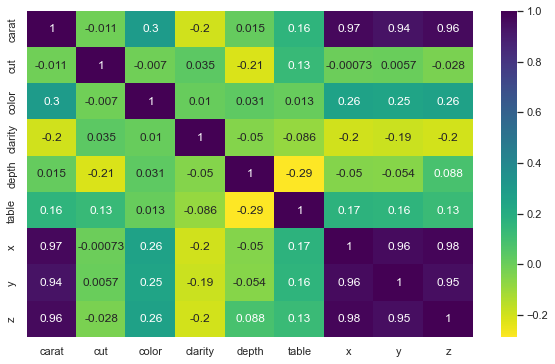

In [33]:
corr = X.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='viridis_r')

**Mean Absolute Difference**

<BarContainer object of 9 artists>

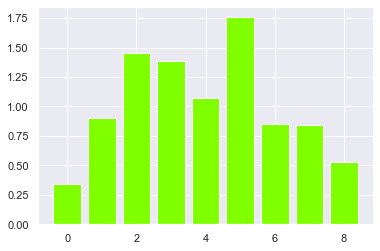

In [34]:
mean_abs_diff = np.sum(np.abs(X -np.mean(X,axis=0)), axis=0)/X.shape[0]

plt.bar(np.arange(X.shape[1]), mean_abs_diff, color='chartreuse')

In [35]:
mean_abs_diff

carat      0.345589
cut        0.905403
color      1.453937
clarity    1.382538
depth      1.070923
table      1.757057
x          0.851736
y          0.843169
z          0.525845
dtype: float64

**Variance Threshold**

In [36]:
v_threshold = VarianceThreshold(threshold=2)
v_threshold.fit(X)
v_threshold.get_support()

array([False, False,  True,  True,  True,  True, False, False, False])

In [37]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

**Dispersion Ratio**

C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:42: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


<BarContainer object of 9 artists>

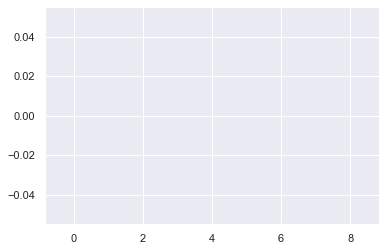

In [38]:
x=X+1
am = np.mean(x, axis=0)
gm = np.power(np.prod(x, axis=0), 1/x.shape[0])
disp_ratio = am/gm

plt.bar(np.arange(x.shape[1]), disp_ratio)

In [39]:
disp_ratio

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

**Random Forest Classifier**

In [40]:
#model = RandomForestClassifier()

#model.fit(X,Y)

#imp = model.feature_importances_

#final_df = pd.DataFrame({"Features":pd.DataFrame(X).columns, "Importances":imp})
#final_df.set_index("Importances")

#final_df = final_df.sort_values('Importances')

#final_df.plot.bar()

**Chi-Square Test**

In [41]:
chi2_features = SelectKBest(chi2, k=5)
X_kbest_features = chi2_features.fit_transform(X,Y)

print(X.shape)
print(X_kbest_features.shape)

(30000, 9)
(30000, 5)


In [42]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [43]:
X_kbest_features

array([[0.23, 1.  , 3.  , 3.95, 3.98],
       [0.21, 1.  , 2.  , 3.89, 3.84],
       [0.23, 1.  , 4.  , 4.05, 4.07],
       ...,
       [0.32, 3.  , 3.  , 4.44, 4.46],
       [0.32, 3.  , 3.  , 4.4 , 4.43],
       [0.32, 3.  , 3.  , 4.4 , 4.44]])

___

### Results

<table>
    <tr><th>Feature Selection Method</th>
        <th>Top 5 Features</th>
    <tr><td>Corelation Coefficient
        <td>Carat, Cut, Clarity, Depth, Table
    <tr><td>Mean Absolute Difference
        <td>Cut, Color, Clarity, Depth, Table
    <tr><td>Variance Threshold
        <td>Color, Clarity, Depth, Table
    <tr><td>Chi-Square Test
        <td>Carat, Color, Clarity, x, y
</table>